# Coursework: Conor Maguire

In [2]:
import numpy as np

## Question 4

### Part i

In [4]:
m = 20
#n = 2*m 
h = 1/(2*m+1)
beta = 5
#beta = 70 will converge for this value, exact threshold in written answers
d = 2	
a = -1 - beta*h/2
e = -1 + beta*h/2

#the following are the coeffs of S, that we worked out in Q3iii
sd = (-2*e*a + d**2)/d
se = (d**2 - e**2)/d
sa = (d**2 - a**2)/d

#"submatrices" of A tilde
D1 = d * np.eye(m, m)  # D1 = D2 by Q2i
D2 = d * np.eye(m, m)  # D1 = D2 by Q2i
E = a * np.eye(m, m) + e * np.eye(m, m, 1)
C = e * np.eye(m, m) + a * np.eye(m, m, -1)

S = sd * np.eye(m, m) + sa * np.eye(m, m, -1) + se * np.eye(m, m, 1) #construct S using our coeffs

In [5]:
# find our diagonal, upper triangular, and lower traingular matrices of S
D = np.diag(np.diag(S))
U = np.triu(S, k=1)
L = np.tril(S, k=-1)


In [6]:
#check these are correct: 
np.linalg.norm(S - (D + U + L))

0.0

In [7]:
b = h**2 * np.ones(m) #since all entires of b are h squared, we have b odd = b even, so we call both b.

t = b - E@np.linalg.inv(D1)@b  #our definition of t from Q3i, using submatrices pf A tilde


### Algorithim Parameters 

In [8]:
niter = 10000
np.random.seed(1234)
x0 = np.random.rand(m) # Initial value of x_0
print(x0)
tol = 1e-8; # Tolerance for termination

[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581 0.27259261
 0.27646426 0.80187218 0.95813935 0.87593263 0.35781727 0.50099513
 0.68346294 0.71270203 0.37025075 0.56119619 0.50308317 0.01376845
 0.77282662 0.88264119]


In [9]:
norm_res_GS = []
xs = []
x = x0 # reset current iterate to old x0
res = t - S@x # initial value of residual for G-S
norm_res_GS.append(np.linalg.norm(res)) # 2-norm of residual

for k in range(niter): # Gauss-Seidel loop
    rhs = t - (U)@x
    x = np.linalg.solve(D+L, rhs) # Can of course be implemented differently
    res = t - S@x
    norm_res_GS.append(np.linalg.norm(res))
    xs.append(x)
    if norm_res_GS[-1] < tol: # termination criterion
        print('Iteration {}: residual {:.4e} is less than tolerance {}\n'.format(k, norm_res_GS[-1], tol))
        break


In [10]:
#we see divergence, the residual increases so Gauss-Seidel is ineffective with our current values. See graph below

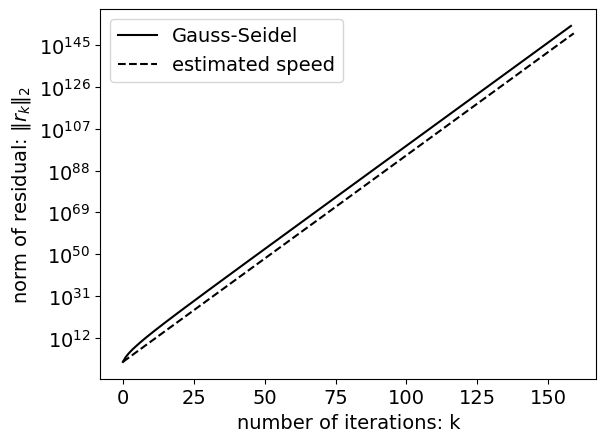

In [26]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

def plot_and_estimate_convergence(norm_res, method, color='k'):
    
    #original code: use for convergence
    #K = len(norm_res)

    #find alpha from 4i example: use for divergence
    K = 160 
    
    # estimate of mid-convergence decay rate per step 
    k0 = int(0.3*K)
    k1 = int(0.7*K)
    alpha = 10 ** ((np.log10(norm_res[k1])-np.log10(norm_res[k0]))/(k1-k0))

    plt.semilogy(norm_res, '-', color=color, label=method)
    k = np.arange(K)
    plt.semilogy(norm_res[0]*alpha**k, '--', color=color, label='estimated speed')

    plt.xlabel('number of iterations: k')
    plt.ylabel('norm of residual: $\|r_k\|_2$')
    plt.legend()
    return alpha

alpha_GS = plot_and_estimate_convergence(norm_res_GS, 'Gauss-Seidel')

In [13]:
#since we have divergence, we need to calucate alpha using values from the 
#portion of the log graph that is an approx. straight line (roughly  20 < k < 150)

K = 160 #since we get divergence, pick K such that alpha is calculated by the approx straight line segement of the graph
# estimate of mid-convergence decay rate per step (using approx. straight line property)

k0 = int(0.3*K)
k1 = int(0.7*K)
alpha = 10 ** ((np.log10(norm_res_GS[k1])-np.log10(norm_res_GS[k0]))/(k1-k0))
print(alpha)

8.710217982398191


In [12]:
#if we plot this we should see that the graph is similar to the convergence graph. See K=160.

## Question 6

### Part i 

In [14]:
n = 40
h = 1/(n+1)
beta = 5
#(beta/(4*m+2))**2 +1
d = 2	
a = -1 - beta*h/2
e = -1 + beta*h/2


A = d * np.eye(n, n) + a * np.eye(n, n, -1) + e * np.eye(n, n, 1) #construct A using our coeffs from definition

b = h**2 * np.ones(n)

In [15]:
# find our diagonal, upper triangular, and lower traingular matrices of S
D = np.diag(np.diag(A))
U = np.triu(A, k=1)
L = np.tril(A, k=-1)


In [16]:
#check these are correct: 
np.linalg.norm(A - (D + U + L))

0.0

In [17]:
niter = 10000
omegas = np.arange(0.1, 2, 0.1) #list of omegas from 0.1 to 1.9, increasing by 0.1 each time
np.random.seed(1234)
x0 = np.random.rand(n) # Initial value of x_0
print(x0)
tol = 1e-8; # Tolerance for termination

[0.19151945 0.62210877 0.43772774 0.78535858 0.77997581 0.27259261
 0.27646426 0.80187218 0.95813935 0.87593263 0.35781727 0.50099513
 0.68346294 0.71270203 0.37025075 0.56119619 0.50308317 0.01376845
 0.77282662 0.88264119 0.36488598 0.61539618 0.07538124 0.36882401
 0.9331401  0.65137814 0.39720258 0.78873014 0.31683612 0.56809865
 0.86912739 0.43617342 0.80214764 0.14376682 0.70426097 0.70458131
 0.21879211 0.92486763 0.44214076 0.90931596]


In [18]:
alphas = []  #list to store different alphas for each different omega
Ks = []

#iterate over omegas here in our list "Omegas"
for w in omegas:
    print(f'Loop {w}')
    #ParamGS = Parameterised Gauss-Seidel
    xs = []
    norm_res_ParamGS = []
    x = x0 # reset current iterate to old x0
    res = b - A@x # initial value of residual for G-S
    norm_res_ParamGS.append(np.linalg.norm(res)) # 2-norm of residual
    for k in range(niter): # Parameterised Gauss-Seidel loop
        rhs = - (w*U +(w-1)*D)@x + w*b
        x = np.linalg.solve(D+(w*L), rhs) # Can of course be implemented differently
        res = b - A@x
        norm_res_ParamGS.append(np.linalg.norm(res))
        xs.append(x)
        if norm_res_ParamGS[-1] < tol: # termination criterion
            k0 = int(0.3*k)
            k1 = int(0.7*k)
            alpha = 10 ** ((np.log10(norm_res_ParamGS[k1])-np.log10(norm_res_ParamGS[k0]))/(k1-k0))
            alphas.append(alpha)
            Ks.append(k)
            print('Iteration {}: residual {:.4e} is less than tolerance {}\n'.format(k, norm_res_GS[-1], tol))
            break

Loop 0.1
Loop 0.2
Loop 0.30000000000000004
Iteration 8959: residual nan is less than tolerance 1e-08

Loop 0.4
Iteration 6318: residual nan is less than tolerance 1e-08

Loop 0.5
Iteration 4733: residual nan is less than tolerance 1e-08

Loop 0.6
Iteration 3677: residual nan is less than tolerance 1e-08

Loop 0.7000000000000001
Iteration 2922: residual nan is less than tolerance 1e-08

Loop 0.8
Iteration 2356: residual nan is less than tolerance 1e-08

Loop 0.9
Iteration 1915: residual nan is less than tolerance 1e-08

Loop 1.0
Iteration 1563: residual nan is less than tolerance 1e-08

Loop 1.1
Iteration 1274: residual nan is less than tolerance 1e-08

Loop 1.2000000000000002
Iteration 1033: residual nan is less than tolerance 1e-08

Loop 1.3000000000000003
Iteration 829: residual nan is less than tolerance 1e-08

Loop 1.4000000000000001
Iteration 654: residual nan is less than tolerance 1e-08

Loop 1.5000000000000002
Iteration 501: residual nan is less than tolerance 1e-08

Loop 1.6
I

In [19]:
#since we didn't get converge for omega = 0.1, 0.2 we take alpha = 1 and K = 9999 for grpahing purposes 
while len(alphas) < len(omegas):
    alphas.insert(0, 1) #take alpha = 1 for non converging omegas
    Ks.insert(0,10000) #take K = 10000 for non converging omegas
    

Text(0, 0.5, 'Number of iterations K')

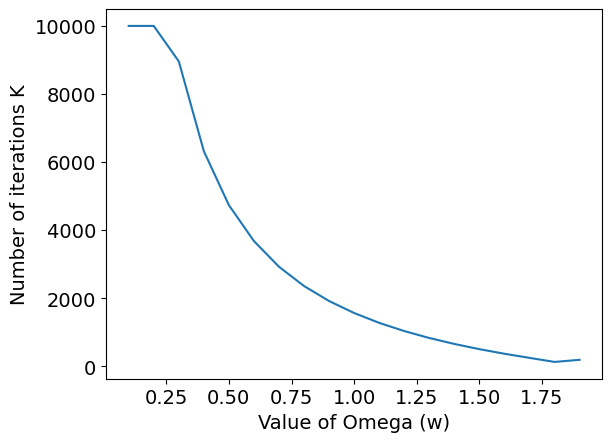

In [20]:
#graph of Number of iterations K against omega
plt.plot(omegas, Ks)

plt.xlabel('Value of Omega (w)')
plt.ylabel('Number of iterations K')


Text(0, 0.5, 'Value of AlphaGS')

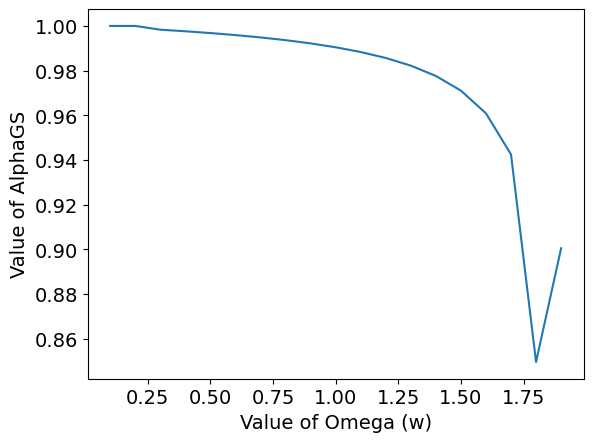

In [21]:
#Graph of Alpha against omega
plt.plot(omegas, alphas)

plt.xlabel('Value of Omega (w)')
plt.ylabel('Value of AlphaGS')

### Part ii 

In [22]:
#now let's experiment to find the value of omega that minimises AlphaGS. 
#Graphically we can see this is around omega = 1.8

In [23]:
optimalOmegas = np.arange(1.75, 1.9, 0.01) #we want to find omega* to two decimal places so it will be in this list.

In [24]:
alphas2 = []  #list to store different alphas for each different omega
Ks = []

#iterate over omegas here in our list "Omegas"
for w in optimalOmegas:
    #ParamGS = Parameterised Gauss-Seidel
    xs = []
    norm_res_ParamGS = []
    x = x0 # reset current iterate to old x0
    res = b - A@x # initial value of residual for G-S
    norm_res_ParamGS.append(np.linalg.norm(res)) # 2-norm of residual
    for k in range(niter): # Parameterised Gauss-Seidel loop
        rhs = - (w*U +(w-1)*D)@x + w*b
        x = np.linalg.solve(D+(w*L), rhs) # Can of course be implemented differently
        res = b - A@x
        norm_res_ParamGS.append(np.linalg.norm(res))
        xs.append(x)
        if norm_res_ParamGS[-1] < tol: # termination criterion
            k0 = int(0.1*k) #we can use a largeer range since these converge much more quickly
            k1 = int(0.9*k)
            alpha = 10 ** ((np.log10(norm_res_ParamGS[k1])-np.log10(norm_res_ParamGS[k0]))/(k1-k0))
            alphas2.append(alpha)
            Ks.append(k)
            print('Iteration {}: residual {:.4e} is less than tolerance {}\n'.format(k, norm_res_GS[-1], tol))
            break

Iteration 187: residual nan is less than tolerance 1e-08

Iteration 175: residual nan is less than tolerance 1e-08

Iteration 163: residual nan is less than tolerance 1e-08

Iteration 151: residual nan is less than tolerance 1e-08

Iteration 139: residual nan is less than tolerance 1e-08

Iteration 126: residual nan is less than tolerance 1e-08

Iteration 113: residual nan is less than tolerance 1e-08

Iteration 103: residual nan is less than tolerance 1e-08

Iteration 110: residual nan is less than tolerance 1e-08

Iteration 117: residual nan is less than tolerance 1e-08

Iteration 122: residual nan is less than tolerance 1e-08

Iteration 132: residual nan is less than tolerance 1e-08

Iteration 143: residual nan is less than tolerance 1e-08

Iteration 156: residual nan is less than tolerance 1e-08

Iteration 171: residual nan is less than tolerance 1e-08



Text(0, 0.5, 'Value of AlphaGS')

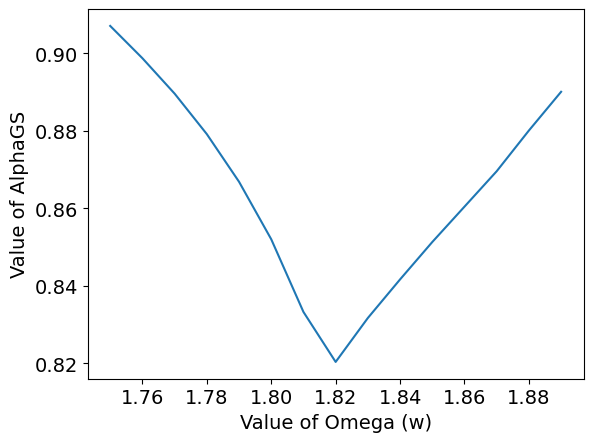

In [25]:
plt.plot(optimalOmegas, alphas2)
plt.xlabel('Value of Omega (w)')
plt.ylabel('Value of AlphaGS')

In [26]:
#we see that the minimum alphaGS equals 0.82 (2 d.p), which is reached when omega = 1.82 (2 d.p)